<a href="https://colab.research.google.com/github/INFINITY-RUBER/Curso_Deep_Learning_Con_TernsorFlow_Machine-Learning_e_IA-/blob/master/scripts/tema08/05-word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#pip install tensorflow==1.14
import tensorflow as tf
print(tf.__version__)

1.14.0


# Predicciones con Word2Vec

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import nlp2_helpers
from nltk.corpus import stopwords
import os
import pickle
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
embedding_size = 200
vocabulary_size = 2000
batch_size = 100
max_words = 100
stops = stopwords.words('english')

In [0]:
texts, target = nlp2_helpers.load_movies_data()
texts = nlp2_helpers.normalize_text(texts, stops)

In [0]:
target = [target[ix] for ix, x in enumerate(texts) if len(x.split())>2]# elimino los textos cortos
texts = [x for x in texts if len(x.split())>2] # limpiamos todo lo corto

In [0]:
train_idx = np.random.choice(len(target), round(0.8*len(target)), replace=False)
test_idx = np.array(list(set(range(len(target)))-set(train_idx)))

In [0]:
texts_train = [x for ix, x in enumerate(texts) if ix in train_idx]
texts_test = [x for ix, x in enumerate(texts) if ix in test_idx]
target_train = np.array([x for ix, x in enumerate(target) if ix in train_idx])
target_test = np.array([x for ix, x in enumerate(target) if ix in test_idx])

In [0]:
# cargamos el dicionario que generamos en la anterior clase 
#dict_file = os.path.join("../../datasets", "movie_vocabulary.pkl") 
dict_file = os.path.join("datasets", "movie_vocabulary.pkl") 
word_dictionary = pickle.load(open(dict_file, 'rb'))

In [25]:
word_dictionary

{'RARE': 0,
 'film': 1,
 'movie': 2,
 'one': 3,
 'like': 4,
 'story': 5,
 'much': 6,
 'even': 7,
 'good': 8,
 'comedy': 9,
 'time': 10,
 'characters': 11,
 'films': 12,
 'little': 13,
 'way': 14,
 'funny': 15,
 'make': 16,
 'movies': 17,
 'enough': 18,
 'never': 19,
 'makes': 20,
 'may': 21,
 'us': 22,
 'best': 23,
 'work': 24,
 'director': 25,
 'bad': 26,
 'doesnt': 27,
 'love': 28,
 'life': 29,
 'would': 30,
 'theres': 31,
 'well': 32,
 'new': 33,
 'could': 34,
 'something': 35,
 'really': 36,
 'made': 37,
 'performances': 38,
 'drama': 39,
 'thats': 40,
 'many': 41,
 'see': 42,
 'look': 43,
 'plot': 44,
 'still': 45,
 'isnt': 46,
 'every': 47,
 'two': 48,
 'nothing': 49,
 'people': 50,
 'better': 51,
 'long': 52,
 'get': 53,
 'without': 54,
 'fun': 55,
 'action': 56,
 'great': 57,
 'though': 58,
 'might': 59,
 'big': 60,
 'also': 61,
 'cast': 62,
 'another': 63,
 'ever': 64,
 'kind': 65,
 'first': 66,
 'audience': 67,
 'humor': 68,
 'sense': 69,
 'character': 70,
 'performance': 71,

In [0]:
text_data_train = np.array(nlp2_helpers.text_to_numbers(texts_train, word_dictionary))
text_data_test = np.array(nlp2_helpers.text_to_numbers(texts_test, word_dictionary))

In [0]:
text_data_train = np.array([x[0:max_words] for x in [y+[0]*max_words for y in text_data_train]])
text_data_test = np.array([x[0:max_words] for x in [y+[0]*max_words for y in text_data_test]])

In [0]:
A = tf.Variable(tf.random_normal(shape = [embedding_size, 1]))
b = tf.Variable(tf.random_normal(shape = [1,1]))

x_data = tf.placeholder(shape = [None, max_words], dtype = tf.int32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)

In [0]:
embeddings = tf.Variable(tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0))# -1.0, 1.0 para tenerlo distribuido

In [0]:
embed = tf.nn.embedding_lookup(embeddings, x_data)
embed_avg = tf.reduce_mean(embed,1)

In [0]:
model_output = tf.add(tf.matmul(embed_avg, A), b)

In [0]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=model_output, labels=y_target))

In [0]:
prediction = tf.round(tf.sigmoid(model_output))
predictions_correct = tf.cast(tf.equal(prediction, y_target), tf.float32)
accuracy = tf.reduce_mean(predictions_correct)

In [0]:
my_optim = tf.train.AdagradOptimizer(0.005)
train_step = my_optim.minimize(loss)

In [0]:
session = tf.Session()
init = tf.global_variables_initializer()
session.run(init)

In [43]:
#model_checkpoint_path = os.path.join("../../datasets", "cbow_movie_embeddings.ckpt")
model_checkpoint_path = os.path.join("datasets", "cbow_movie_embeddings.ckpt")
saver = tf.train.Saver({"embeddings": embeddings})
saver.restore(session, model_checkpoint_path)

INFO:tensorflow:Restoring parameters from datasets/cbow_movie_embeddings.ckpt


In [45]:
session.run(embeddings)

array([[-0.78239244, -0.00631882,  0.09871728, ..., -1.1275424 ,
         0.14766511, -0.06275839],
       [-0.7324114 , -0.55063033,  0.67764235, ...,  0.1853559 ,
        -0.0074749 ,  0.3367629 ],
       [ 0.2446425 , -0.3455224 ,  0.7737653 , ..., -0.95954823,
        -0.02839899,  0.7460277 ],
       ...,
       [-0.35212493, -0.41145658, -0.9123392 , ..., -0.8611164 ,
        -0.4660437 ,  0.01323915],
       [ 0.2103064 , -0.07216167, -0.37179995, ...,  0.4202845 ,
         0.20270944, -0.98527884],
       [-0.13023782,  0.06753612,  0.20052695, ..., -0.57783914,
         0.5429959 , -0.9232695 ]], dtype=float32)

In [46]:
train_loss = []
test_loss = []
train_acc = []
test_acc = []
i_data = []

for i in range(10000):
    rand_idx = np.random.choice(text_data_train.shape[0], size = batch_size)
    rand_x = text_data_train[rand_idx]
    rand_y = np.transpose([target_train[rand_idx]])
    session.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    if(i+1)%100==0:
        i_data.append(i+1)
        
        train_loss_temp = session.run(loss, feed_dict={x_data: rand_x, y_target:rand_y})
        train_loss.append(train_loss_temp)
        
        test_loss_temp = session.run(loss, feed_dict={x_data: text_data_test, y_target: np.transpose([target_test])})
        test_loss.append(test_loss_temp)
        
        train_acc_temp = session.run(accuracy, feed_dict={x_data: rand_x, y_target:rand_y})
        train_acc.append(train_acc_temp)
        
        test_acc_temp = session.run(accuracy, feed_dict={x_data: text_data_test, y_target: np.transpose([target_test])})
        test_acc.append(test_acc_temp)
        
    if(i+1)%500==0:
        acc_and_loss = [i+1, train_loss_temp, test_loss_temp, train_acc_temp, test_acc_temp]
        acc_and_loss = [np.round(x,3) for x in acc_and_loss]
        print("Paso #{}, Train Loss {}, Test Loss {}. Train Acc {}, Test Acc{}".format(*acc_and_loss))

Paso #500, Train Loss 0.7310000061988831, Test Loss 0.7120000123977661. Train Acc 0.4399999976158142, Test Acc0.5
Paso #1000, Train Loss 0.6949999928474426, Test Loss 0.7070000171661377. Train Acc 0.5899999737739563, Test Acc0.49799999594688416
Paso #1500, Train Loss 0.699999988079071, Test Loss 0.7059999704360962. Train Acc 0.5199999809265137, Test Acc0.49900001287460327
Paso #2000, Train Loss 0.6940000057220459, Test Loss 0.7020000219345093. Train Acc 0.5099999904632568, Test Acc0.4970000088214874
Paso #2500, Train Loss 0.7149999737739563, Test Loss 0.7009999752044678. Train Acc 0.4399999976158142, Test Acc0.5009999871253967
Paso #3000, Train Loss 0.6869999766349792, Test Loss 0.699999988079071. Train Acc 0.550000011920929, Test Acc0.5040000081062317
Paso #3500, Train Loss 0.6840000152587891, Test Loss 0.6990000009536743. Train Acc 0.5400000214576721, Test Acc0.5049999952316284
Paso #4000, Train Loss 0.699999988079071, Test Loss 0.699999988079071. Train Acc 0.5400000214576721, Test A

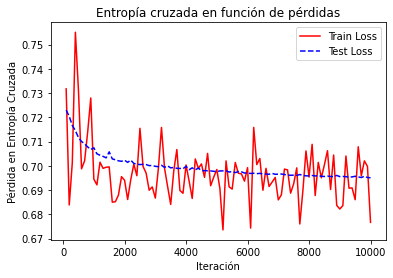

In [47]:
plt.plot(i_data, train_loss, 'r-', label="Train Loss")
plt.plot(i_data, test_loss, 'b--', label="Test Loss")
plt.title("Entropía cruzada en función de pérdidas")
plt.xlabel("Iteración")
plt.ylabel("Pérdida en Entropía Cruzada")
plt.legend(loc = "upper right")
plt.show()

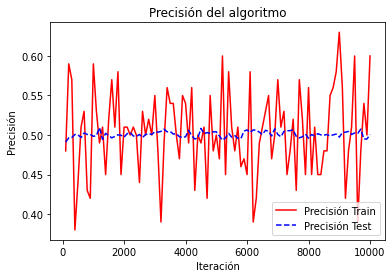

In [48]:
plt.plot(i_data, train_acc, 'r-', label="Precisión Train")
plt.plot(i_data, test_acc, 'b--', label="Precisión Test")
plt.title("Precisión del algoritmo")
plt.xlabel("Iteración")
plt.ylabel("Precisión")
plt.legend(loc = "lower right")
plt.show()